# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [1]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [2]:
def f(x):
    f = (x**2)*numpy.sin(x)
    return f;


Ensure your function works with numpy arrays:

In [3]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [4]:
def g(x):
    g = (2 - (x**2))*numpy.cos(x) + 2*x*numpy.sin(x) - 2
    return g;


Check your solution with the same numpy array:

In [5]:
assert g(0) == 0.

In [6]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [7]:
def integrate_analytic(xmin, xmax):
    i = (2 -(xmax**2))*numpy.cos(xmax)+2*xmax*numpy.sin(xmax) -2 -((2 - (xmin**2))*numpy.cos(xmin) + 2*xmin*numpy.sin(xmin) - 2)
    return i;

Check your analytic function:

In [8]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [9]:
def integrate_numeric(xmin, xmax, N):
    
    dx=((xmax - xmin))/N
    h = f(xmin) + f(xmax) 
    k= 0
    for i in range (0, N ): 
        
        k= k+ 4*f(xmin+i*dx+ dx/2)
    for i in range (1, N ):
        
        k= k + 2*f(xmin + i*dx)
    m = (h+ k)*dx/6
    return m;


Make sure you have implemented Simpson's rule correctly:

In [10]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [11]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


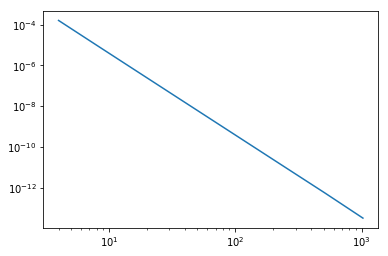

In [12]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution

#fractional_error = resultanalytic - integrate_numeric/resultanalytic
list1 = []
for i in (panel_counts):
    d = (result_analytic - integrate_numeric(x0, x1 , i))/ result_analytic
    list1.append(d)

plt.loglog (panel_counts,list1)
plt.xlabel("panel number")
plt.ylabel(" fractional error ")
plt.title("log-log plot showing the fractional error between analytical and numerical integration as the number of panels is varied.")

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

Increasing the number of panels increases the accuracy of the numerical method as the error on the difference between
the analytical and numerical methods follows N^-4 behaviour when using the Simpson rule. However, this is
on the case to a certain point.
Indeed, if the number of panels is taken to be too large (in this case, about 10^5 for a small integral range), 
then we run into numerical round off issues and the errors become inconsistent and irregular. In the case of the number of panels being too large, the error becomes dependent on the shape of the function being integrated.

If the trapezium rule was being used, how would the panel
count affect accuracy? 



Similarly to the case of the Simpson rule, if the trapezium rule was being used, the use of a large amount of panels
would increase accuracy (the error on the difference between the analytical and numerical methods follows N^-2 behaviour) up to a certain number of panels (in this case, about 10^6 for a small integral range) where we would run into similar numerical round off issues as for the Simpson rule.  
We note, however, that the Simpson rule is generally more accurate than the trapezium rule for the same number of panels. 